# DS-SF-30 | Codealong 11: Logistic Regression

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## `Iris` dataset, Take 2

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-11-iris.csv'))

In [3]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### Feature matrix and label vector

In [4]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]

In [5]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
c = df.Species

In [7]:
c

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, dtype: object

## Activity | Create a one-hot encoding/binary variables for the outcome variable

In [23]:
cs =pd.get_dummies(c)




## Activity | Run logistic regression to learn whether or not an iris plant is a `Setosa`

- (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [24]:
model_Setosa = linear_model.LogisticRegression().fit(X, cs.Setosa)

> ## What's the accuracy of your model?

In [25]:
model_Setosa.score(X, cs.Setosa)

1.0

> ## Log odds plot (that each plant in the dataset is a `Setosa`)

In [26]:
logit_hat_Setosa = model_Setosa.intercept_ + \
    (X * model_Setosa.coef_[0]).sum(axis = 1)

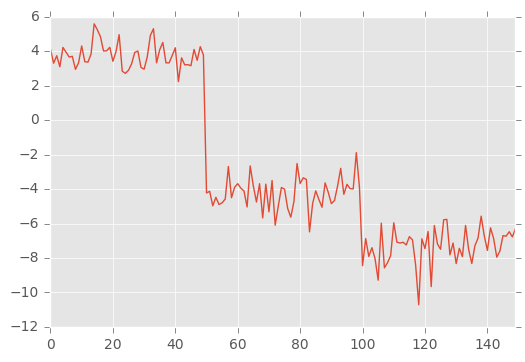

In [27]:
logit_hat_Setosa.plot()

> ## Using just the log odds, let's confirm the model accuracy

In [ ]:
((logit_hat_Setosa >= 0) == (cs.Setosa == 1)).sum()

In [ ]:
((logit_hat_Setosa >= 0) == (cs.Setosa == 1)).mean()

> ## Odds plot (that each plant in the dataset is a `Setosa`)

In [ ]:
odds_hat_Setosa = np.exp(logit_hat_Setosa)

In [ ]:
odds_hat_Setosa.plot()

> ## Now, using just the odds, let's confirm the model accuracy

In [ ]:
((odds_hat_Setosa >= 1) == (cs.Setosa == 1)).sum()

In [ ]:
((odds_hat_Setosa >= 1) == (cs.Setosa == 1)).mean()

> ## Log class probabilities (that each plant in the dataset is a `Setosa`)

In [ ]:
p_hat_Setosa = odds_hat_Setosa / (1 + odds_hat_Setosa)

In [ ]:
p_hat_Setosa

In [ ]:
p_hat_Setosa.plot()

> ## Using the class probabilities, let's confirm for the last time the model accuracy

In [ ]:
((p_hat_Setosa >= .5) == (cs.Setosa == 1)).sum()

In [ ]:
((p_hat_Setosa >= .5) == (cs.Setosa == 1)).mean()

In [ ]:
p_hat_Setosa

> ## Finally, let's compute the outcome class for the `Setosa` model and verify the model accuracy

In [ ]:
c_hat_Setosa = p_hat_Setosa.round()

In [ ]:
c_hat_Setosa.plot(ylim = (0, 1.01))

In [ ]:
(c_hat_Setosa == cs.Setosa).sum()

In [ ]:
(c_hat_Setosa == cs.Setosa).mean()

In [ ]:
pd.crosstab(c_hat_Setosa,
    cs.Setosa,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

## Versicolor

In [ ]:
model_Versicolor = linear_model.LogisticRegression().\
    fit(X, cs.Versicolor)

In [ ]:
model_Versicolor.score(X, cs.Versicolor)

In [ ]:
logit_hat_Versicolor = model_Versicolor.intercept_ + \
    (X * model_Versicolor.coef_[0]).sum(axis = 1)

In [ ]:
logit_hat_Versicolor.plot()

In [ ]:
((logit_hat_Versicolor >= 0) == (cs.Versicolor == 1)).mean()

In [ ]:
((logit_hat_Versicolor >= 0) == (cs.Versicolor == 1)).sum()

In [ ]:
((logit_hat_Versicolor >= 0) != (cs.Versicolor == 1)).sum()

In [ ]:
odds_hat_Versicolor = np.exp(logit_hat_Versicolor)

In [ ]:
odds_hat_Versicolor.plot()

In [ ]:
p_hat_Versicolor = odds_hat_Versicolor / (1 + odds_hat_Versicolor)

In [ ]:
p_hat_Versicolor.plot()

In [ ]:
c_hat_Versicolor = p_hat_Versicolor.round()

In [ ]:
c_hat_Versicolor.plot()

In [ ]:
pd.DataFrame({'class': c_hat_Versicolor, 'index': c_hat_Versicolor.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

In [ ]:
pd.DataFrame({'class': cs.Versicolor, 'index': cs.Versicolor.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

In [ ]:
(c_hat_Versicolor == cs.Versicolor).sum()

In [ ]:
(c_hat_Versicolor != cs.Versicolor).sum()

In [ ]:
pd.crosstab(c_hat_Versicolor,
    cs.Versicolor,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

## Virginica

In [ ]:
model_Virginica = linear_model.LogisticRegression().\
    fit(X, cs.Virginica)

In [ ]:
model_Virginica.score(X, cs.Virginica)

In [ ]:
logit_hat_Virginica = model_Virginica.intercept_ + \
    (X * model_Virginica.coef_[0]).sum(axis = 1)

In [ ]:
logit_hat_Virginica.plot()

In [ ]:
((logit_hat_Virginica >= 0) == (cs.Virginica == 1)).mean()

In [ ]:
((logit_hat_Virginica >= 0) == (cs.Virginica == 1)).sum()

In [ ]:
((logit_hat_Virginica >= 0) != (cs.Virginica == 1)).sum()

In [ ]:
odds_hat_Virginica = np.exp(logit_hat_Virginica)

In [ ]:
odds_hat_Virginica.plot()

In [ ]:
p_hat_Virginica = odds_hat_Virginica / (1 + odds_hat_Virginica)

In [ ]:
p_hat_Virginica.plot()

In [ ]:
c_hat_Virginica = p_hat_Virginica.round()

In [ ]:
c_hat_Virginica.plot()

In [ ]:
pd.DataFrame({'class': c_hat_Virginica, 'index': c_hat_Virginica.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

In [ ]:
pd.DataFrame({'class': cs.Virginica, 'index': cs.Virginica.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

In [ ]:
(c_hat_Virginica == cs.Virginica).sum()

In [ ]:
(c_hat_Virginica != cs.Virginica).sum()

In [ ]:
pd.crosstab(c_hat_Virginica,
    cs.Virginica,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

## Activity | Let's combine the models together!

In [ ]:
hats = pd.DataFrame({'Setosa': c_hat_Setosa,
    'Versicolor': c_hat_Versicolor,
    'Virginica': c_hat_Virginica})

In [ ]:
hats.sum()

In [ ]:
hats.sum().sum()

In [ ]:
hats.sum(axis = 1).value_counts()

In [ ]:
pd.crosstab(hats.Setosa, [hats.Versicolor, hats.Virginica])

In [ ]:
hats = pd.DataFrame({'p_Setosa': p_hat_Setosa,
    'p_Versicolor': p_hat_Versicolor,
    'p_Virginica': p_hat_Virginica})

hats['p'] = hats.max(axis = 1)

hats['c'] = 'Setosa'
hats.loc[hats.p_Versicolor == hats.p, 'c'] = 'Versicolor'
hats.loc[hats.p_Virginica == hats.p, 'c'] = 'Virginica'

In [ ]:
hats

In [ ]:
(hats.c == c).mean()

In [ ]:
(hats.c == c).sum()

In [ ]:
(hats.c != c).sum()

In [ ]:
pd.crosstab(
    hats.c,
    c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

## Multiclass Logistic Regression

In [ ]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
c = df.Species

model = linear_model.LogisticRegression().\
    fit(X, c)

In [ ]:
model.score(X, c)

In [ ]:
c_hat = model.predict(X)

pd.crosstab(c_hat,
    c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

In [28]:
train_df = df_clean.sample(frac = .5, random_state = 0).sort_index()
test_df = df_clean.drop(train_df.index)

NameError: name 'df_clean' is not defined